TOPIC: Market Basket Analysis for E-commerce



# INTRODUCTION
Market Basket Analysis for E-commerce

Market Basket Analysis is one of the key techniques used by large retailers to uncover associations between items. It works by looking for combinations of items that occur together frequently in transactions. It allows retailers to identify relationships between the items that people buy.

- Using Aprori Algorithm to perform the analysis: 
The apriori algorithm is  a classical algorithm in data minning that we can use for marketting application.  It is very important in market basket analysis and it helps customers in purchasing their items with ease which as well help the business to know and decide the items to purchase in realtion to the other.This increases the market sales.  




# **Objective**

The goal of this project is to get introduced to the concept of market basket analysis, which is a crucial aspect of data science in retail and e-commerce. 
Here we learnt how to extract valuable insights from transaction data, understand customer purchasing behaviour, and use the knowledge for business optimization.

Market Basket Analysis for E-commerce Imagine you are working for a retail company, and you have access to a dataset containing customer transactions. Your task is to perform market basket analysis to uncover patterns in customer purchasing behavior. By identifying which products  tend  to  be  bought  together,  the  company  can  make  informed  decisions  to  improve  sales  and  customer satisfaction.

# **Tools used**
**Data Analysis Tool:**
 Python (using libraries like Pandas, etc.)

 **Data Visualization Tool:**  Matplotlib, Seaborn•Scikit-Learn•Jupyter NotebookTool




High-Level Steps:

1.Data desription

2.Data Preparation

3.Exploratory Data Analysis (EDA)

4.Market Basket Analysis: Using Aprori Algorithm

5.Visualization

6.Interpretation and Insights

7.Recommendations

8.Presentation# New Section

**Data Description**`

Our data has 38765 row and 3 columns. Each entry contains the following information

1. Member number: the number of people that purchased item in a specific date
2. Date: the days at which items re purchased
3. Item description: describes the items purchased


# Exploratory Data Analysis(EDA)
data preparation

data cleaning
```
# This is formatted as code
```



**Data Preparation**

In [40]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # for plotting
import matplotlib.dates as md
import seaborn as sns
import datetime as dt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


### reading or loading the data set

In [2]:
data=pd.read_csv("Groceries_dataset.csv")

In [3]:
#printing by default 5 rows of the data set
data.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


**Exploring the data**

Data Cleaning

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [5]:
#checking the total number of rows and column in the data set
data.shape

(38765, 3)

In [6]:
#checking for null values
data.isnull().any()

Member_number      False
Date               False
itemDescription    False
dtype: bool

Observation

There is no null value in the data set

In [7]:
#changing the column name
column= data.columns.to_list()
column[0]="Member_Number"
column[2] = 'Item_Description'
column

['Member_Number', 'Date', 'Item_Description']

In [8]:
data.columns =column

In [9]:
# to get the statistical value of the data set
data.describe()

,Member_Number
count,38765.000000
mean,3003.641868
std,1153.611031
min,1000.000000
25%,2002.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


In [10]:
#working with the date from start to end
data['Date'] = pd.to_datetime(data['Date'])

#data.sort_values(by='Dates', ascending = False, inplace = True)
data['Date']



0       2015-07-21
1       2015-05-01
2       2015-09-19
3       2015-12-12
4       2015-01-02
           ...    
38760   2014-08-10
38761   2014-02-23
38762   2014-04-16
38763   2014-03-12
38764   2014-12-26
Name: Date, Length: 38765, dtype: datetime64[ns]

In [11]:
#finding the duration of time of which the analysis is to be carried out
data['Date'].max() - data['Date'].min()


Timedelta('728 days 00:00:00')

In [12]:
data.iloc[-30:].describe().astype(int)


,Member_Number
count,30
mean,2847
std,1314
min,1045
25%,1635
50%,2806
75%,4255
max,4879


Observation from the table above:

In the last 30 days, the average items purchased by people was about 2847.
When the time of the trade was about 75%, the number of members who purchased items were below 4255 and it reached a maximum of 4879 number of members.
And the median qauntity is 1045


**Checking the uniqueness of the data set**

In [13]:
data['Member_Number'].unique()

array([1808, 2552, 2300, ..., 3607, 4587, 2417], dtype=int64)

In [14]:
data['Item_Description'].unique()

array(['tropical fruit', 'whole milk', 'pip fruit', 'other vegetables',
       'rolls/buns', 'pot plants', 'citrus fruit', 'beef', 'frankfurter',
       'chicken', 'butter', 'fruit/vegetable juice',
       'packaged fruit/vegetables', 'chocolate', 'specialty bar',
       'butter milk', 'bottled water', 'yogurt', 'sausage', 'brown bread',
       'hamburger meat', 'root vegetables', 'pork', 'pastry',
       'canned beer', 'berries', 'coffee', 'misc. beverages', 'ham',
       'turkey', 'curd cheese', 'red/blush wine',
       'frozen potato products', 'flour', 'sugar', 'frozen meals',
       'herbs', 'soda', 'detergent', 'grapes', 'processed cheese', 'fish',
       'sparkling wine', 'newspapers', 'curd', 'pasta', 'popcorn',
       'finished products', 'beverages', 'bottled beer', 'dessert',
       'dog food', 'specialty chocolate', 'condensed milk', 'cleaner',
       'white wine', 'meat', 'ice cream', 'hard cheese', 'cream cheese ',
       'liquor', 'pickled vegetables', 'liquor (appetizer

In [15]:
data['Date'].unique()

array(['2015-07-21T00:00:00.000000000', '2015-05-01T00:00:00.000000000',
       '2015-09-19T00:00:00.000000000', '2015-12-12T00:00:00.000000000',
       '2015-01-02T00:00:00.000000000', '2015-02-14T00:00:00.000000000',
       '2015-08-05T00:00:00.000000000', '2015-12-23T00:00:00.000000000',
       '2015-03-20T00:00:00.000000000', '2015-12-02T00:00:00.000000000',
       '2015-02-24T00:00:00.000000000', '2015-04-14T00:00:00.000000000',
       '2015-03-09T00:00:00.000000000', '2015-03-30T00:00:00.000000000',
       '2015-03-05T00:00:00.000000000', '2015-02-09T00:00:00.000000000',
       '2015-03-08T00:00:00.000000000', '2015-07-07T00:00:00.000000000',
       '2015-08-09T00:00:00.000000000', '2015-12-11T00:00:00.000000000',
       '2015-09-18T00:00:00.000000000', '2015-11-30T00:00:00.000000000',
       '2015-07-17T00:00:00.000000000', '2015-12-06T00:00:00.000000000',
       '2015-02-13T00:00:00.000000000', '2015-01-14T00:00:00.000000000',
       '2015-08-03T00:00:00.000000000', '2015-01-27

In [16]:
#exporting the cleaned data set

data.to_csv("cleaned_data.csv")

## Performing some data visualizations

In [17]:
# item description and member number would be plotted against each other; group by function would be used to find the highest(top 10)
# Grouping of the two columns ['Item_Description','Member_Number']
items = data.groupby('Item_Description')['Member_Number'].size().sort_values(ascending = False).head(10)

In [18]:
items

Item_Description
whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
Name: Member_Number, dtype: int64

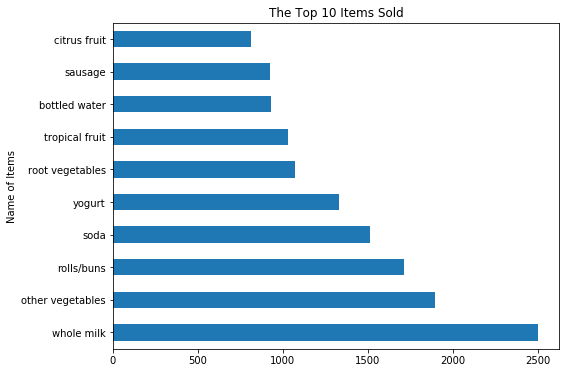

In [19]:
plt.figure(figsize=(12,6))
items.plot(kind ='barh', xlabel = 'Name of Items', ylabel = 'Quantity of Items Sold', title = 'The Top 10 Items Sold', figsize =(8,6));

Observation
From the above chart, it was seen that whole milk is the most purchased of the product.

In [20]:
# setting Member_Number as index
data.to_csv('cleaned_data.csv')


In [21]:
#setting the 'Date' column as the index of the dataframe. It makes plotting easy.

data_date = data.set_index(['Date']) ## Setting date as index for plotting purpose

data_date

,Member_Number,Item_Description
Date,,
2015-07-21,1808,tropical fruit
2015-05-01,2552,whole milk
2015-09-19,2300,pip fruit
2015-12-12,1187,other vegetables
2015-01-02,3037,whole milk
...,...,...
2014-08-10,4471,sliced cheese
2014-02-23,2022,candy
2014-04-16,1097,cake bar


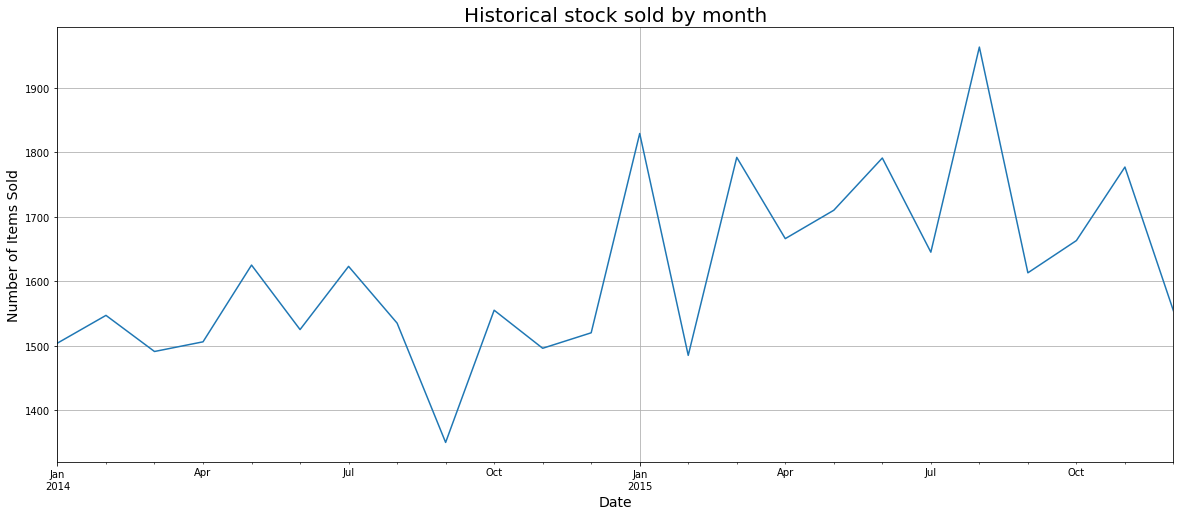

In [35]:
#visualizing the daily prices of the company share.
data_date.resample('M')["Item_Description"].count().plot(figsize=(20,8), grid =True)
plt.title("Historical stock sold by month", fontsize =20)

#setting the x and y axis label
plt.ylabel('Number of Items Sold', fontsize =14)
plt.xlabel('Date', fontsize=14)

#to save graph
#fig.savefig('stock.png')
plt.show()




##### Observation:
The resample keyword was used to graph the visualization in timely order as to extract meaningful insights from the data 
for a better understanding of the data that is being visualized.
From the graph above, in the months of September, 2014, the company experineced a drastic drop in sales but in between August
and September 2015, there was a rapid increase in sales.That is to say sales was at the climax. 
It was also observed from the graph that the month of October always come with a sudden decrease in sale and it was seen in 2014 and 2015.

In [23]:
data_number = data.set_index(['Member_Number']) ## Setting date as index for plotting purpose
data_number

,Date,Item_Description
Member_Number,,
1808,2015-07-21,tropical fruit
2552,2015-05-01,whole milk
2300,2015-09-19,pip fruit
1187,2015-12-12,other vegetables
3037,2015-01-02,whole milk
...,...,...
4471,2014-08-10,sliced cheese
2022,2014-02-23,candy
1097,2014-04-16,cake bar


In [24]:
# to get the record of a particular id, say 3037, that is extracting values from the dataset
data_number.loc[3037]

,Date,Item_Description
Member_Number,,
3037,2015-01-02,whole milk
3037,2015-02-23,cling film/bags
3037,2015-01-02,other vegetables
3037,2015-02-23,ham
3037,2015-01-02,white bread


Observation

It is seen from the 3037 id that was extracted, it is possible that person who buys cling films can also go for bags.
we can do same to extract other member numbers to see the similarity in their purchase of one item and another.

In [25]:
#printing the first 50 rows
data_number['Date'][:50]

Member_Number
1808   2015-07-21
2552   2015-05-01
2300   2015-09-19
1187   2015-12-12
3037   2015-01-02
4941   2015-02-14
4501   2015-08-05
3803   2015-12-23
2762   2015-03-20
4119   2015-12-02
1340   2015-02-24
2193   2015-04-14
1997   2015-07-21
4546   2015-03-09
4736   2015-07-21
1959   2015-03-30
1974   2015-03-05
2421   2015-02-09
1513   2015-03-08
1905   2015-07-07
2810   2015-08-09
2867   2015-12-11
3962   2015-09-18
1088   2015-11-30
4976   2015-07-17
4056   2015-12-06
3611   2015-02-13
1420   2015-01-14
4286   2015-08-03
4918   2015-01-27
4783   2015-10-22
3709   2015-10-26
4289   2015-08-10
1559   2015-03-10
2900   2015-11-04
1905   2015-02-21
3527   2015-09-29
1495   2015-09-01
3558   2015-03-04
3128   2015-04-20
1863   2015-04-08
3841   2015-07-19
3903   2015-06-10
2658   2015-10-16
4272   2015-06-06
1120   2015-09-26
2676   2015-08-15
1697   2015-05-21
2507   2015-08-25
4620   2015-11-03
Name: Date, dtype: datetime64[ns]

In [26]:
#getting the count of items in the data set
data['Item_Description'].value_counts()

whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: Item_Description, Length: 167, dtype: int64

In [27]:
 #subset the data to only include whole milk
data_wholemilk = data[data['Item_Description'] == 'whole milk']
data_wholemilk.head()

,Member_Number,Date,Item_Description
1,2552,2015-05-01,whole milk
4,3037,2015-01-02,whole milk
8,2762,2015-03-20,whole milk
21,2867,2015-12-11,whole milk
53,1061,2015-05-09,whole milk


#Split the whole milk to only include 1 name
item_desc = data_wholemilk['Item_Description'].str.split(',', expand=True).stack()
#convert to a dataframe
item_desc = pd.DataFrame(item_desc)
item_desc.head() # view the first few rows

#### Using Apriori Algorithm for further analysis and enhance understanding

In [28]:
data.head(2)

,Member_Number,Date,Item_Description
0,1808,2015-07-21,tropical fruit
1,2552,2015-05-01,whole milk


In [29]:
data['Transaction'] = data['Member_Number'].astype(str)+'_'+data['Date'].astype(str)

In [30]:
data.head(2)

,Member_Number,Date,Item_Description,Transaction
0,1808,2015-07-21,tropical fruit,1808_2015-07-21
1,2552,2015-05-01,whole milk,2552_2015-05-01


#### Installing and importing the necessary packages for the apriori algorithm

In [31]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [47]:
data2 = pd.crosstab(data['Transaction'], data['Item_Description'])
data2.head()


Item_Description,Instant food products,...
Transaction,,
1000_2014-06-24,0,...
1000_2015-03-15,0,...
1000_2015-05-27,0,...
1000_2015-07-24,0,...
1000_2015-11-25,0,...


Here there are 5 rows and 167 columns which shows how many items or how many times an item is being purchased in a
one transaction. That is for instance in 1000 transactions made in 2014-06-24, while most people only shop for 2-3 items,some items where not shopped which indicates 0 (zero).

#### Data preprocessing

In [53]:
#encoding all values in the data frame to 0 and 1 (to numerical values).

def encode(item_freq):
    i = 0
    if item_freq > 0:
        i = 1
    return i
    
basket = data2.applymap(encode)




In [55]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
pd.set_option('max_rows', 167)
pd.set_option('max_columns', 10)
frequent_itemsets = apriori(basket, min_support=0.001, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift")

rules.head()



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(bottled water),(UHT-milk),0.060683,0.021386,0.001069,0.017621,0.823954,-0.000228,0.996168,-0.185312
1,(UHT-milk),(bottled water),0.021386,0.060683,0.001069,0.050000,0.823954,-0.000228,0.988755,-0.179204
2,(other vegetables),(UHT-milk),0.122101,0.021386,0.002139,0.017515,0.818993,-0.000473,0.996060,-0.201119
3,(UHT-milk),(other vegetables),0.021386,0.122101,0.002139,0.100000,0.818993,-0.000473,0.975443,-0.184234
4,(UHT-milk),(sausage),0.021386,0.060349,0.001136,0.053125,0.880298,-0.000154,0.992371,-0.121998


Here, the antecedents and consequents columns inidcate items that are frequently purchased. So there is every likelihood that if customers purchase bottle water,they can aslo purchase UHT-milk.

In [57]:
#To get the 10 most frequently combined items in the entire dataset. we then sort the dataset by support, confidence, and lift:

rules.sort_values(["support", "confidence","lift"],axis = 0, ascending = False).head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
623,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550,-0.214986
622,(whole milk),(rolls/buns),0.157923,0.110005,0.013968,0.088447,0.804028,-0.003404,0.976350,-0.224474
695,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861,-0.190525
694,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,-0.002401,0.983638,-0.203508
550,(soda),(other vegetables),0.097106,0.122101,0.009691,0.099794,0.817302,-0.002166,0.975219,-0.198448
551,(other vegetables),(soda),0.122101,0.097106,0.009691,0.079365,0.817302,-0.002166,0.980729,-0.202951
649,(sausage),(whole milk),0.060349,0.157923,0.008955,0.148394,0.939663,-0.000575,0.988811,-0.063965
648,(whole milk),(sausage),0.157923,0.060349,0.008955,0.056708,0.939663,-0.000575,0.996140,-0.070851
624,(yogurt),(rolls/buns),0.085879,0.110005,0.007819,0.091051,0.827697,-0.001628,0.979147,-0.185487
625,(rolls/buns),(yogurt),0.110005,0.085879,0.007819,0.071081,0.827697,-0.001628,0.984071,-0.189562


Observation
buns and milk, yogurt and milk, sausage and milk, soda and vegetable, and yogurt and buns; these are the frequently combined purchases made by customers

Recommendation:
I would recommend that in subsequent analysis should:
1.try doing the visualization of sales and items on daily basis,
2.the use of machine learning algorithm be used to make prediction in relationship with the items. 

# References
1.  https://365datascience.com/tutorials/python-tutorials/market-basket-analysis/
2. https://www.kaggle.com/code/subhadeepdebnath/market-basket-analysis-apriori-perfect-template